<b>First-visit Monte Carlo</b>

https://towardsdatascience.com/reinforcement-learning-rl-101-with-python-e1aa0d37d43b

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [3]:
actions

[[-1, 0], [1, 0], [0, 1], [0, -1]]

In [4]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [7]:
deltas

{(0, 0): [],
 (0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (1, 0): [],
 (1, 1): [],
 (1, 2): [],
 (1, 3): [],
 (2, 0): [],
 (2, 1): [],
 (2, 2): [],
 (2, 3): [],
 (3, 0): [],
 (3, 1): [],
 (3, 2): [],
 (3, 3): []}

In [8]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [9]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    #print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:20<00:00, 496.81it/s]


In [10]:
V

array([[ 0.        , -1.65144442, -2.23275982, -2.38673005],
       [-1.6403852 , -2.10260198, -2.28505759, -2.21396006],
       [-2.22672154, -2.27593608, -2.10829537, -1.653413  ],
       [-2.38385426, -2.21693518, -1.63948474,  0.        ]])

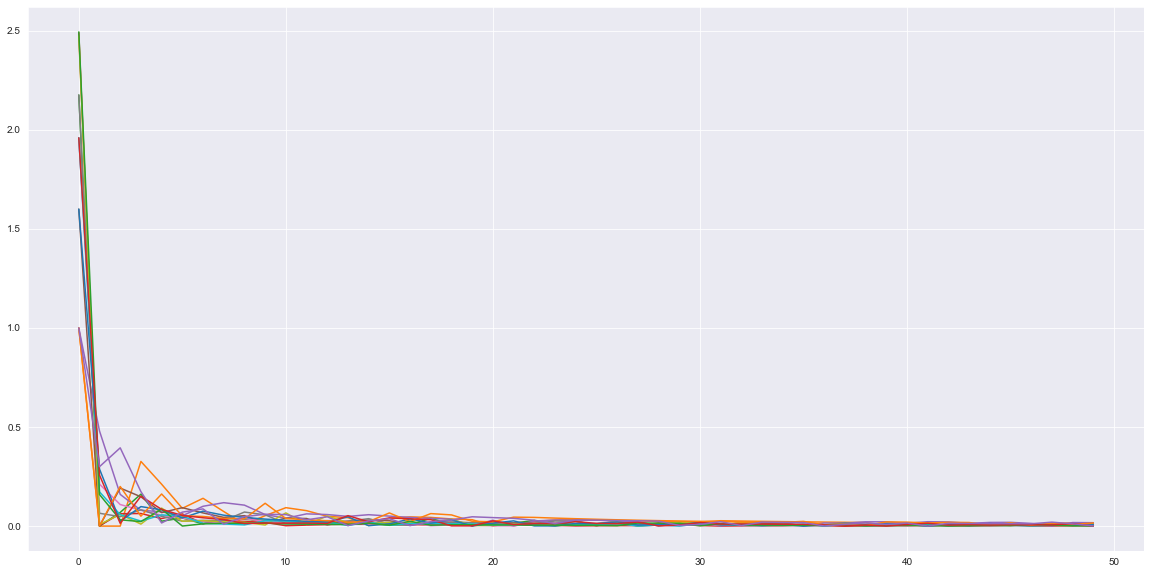

In [11]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

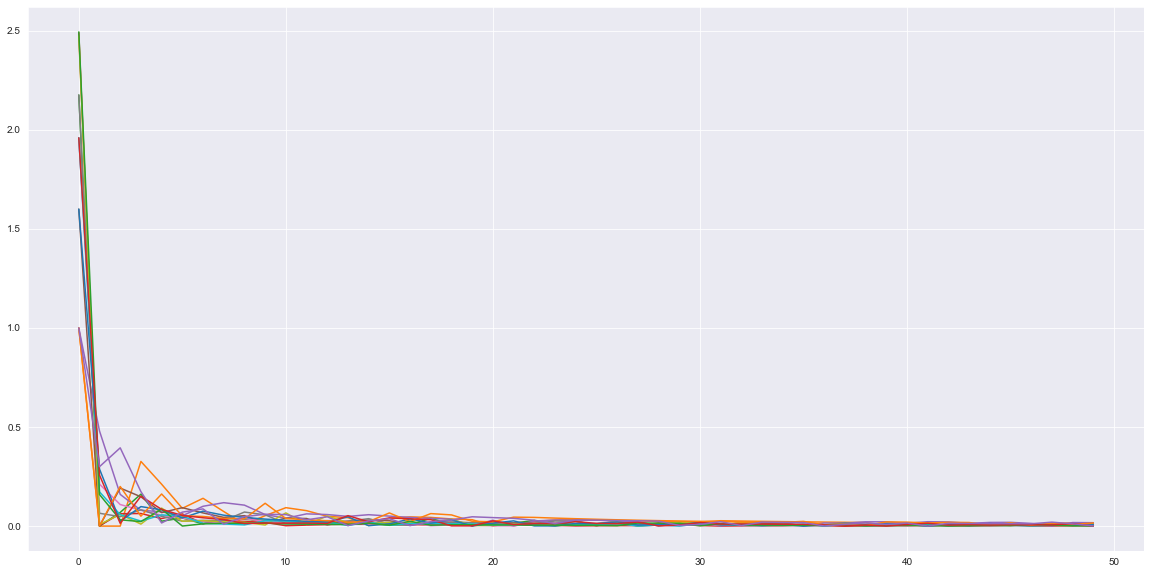

In [12]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)